# 地理探测器

## 1. 地理探测器原理

空间分异性是地理现象的基本特点之一。地理探测器是探测和利用空间分异性的工具。地理探测器包括4个探测器。
分异及因子探测：探测Y的空间分异性；以及探测某因子X多大程度上解释了属性Y的空间分异（图1）。用q值度量
，表达式为：

$$q = 1 - \frac {\sum_{h=1}^LN_h \sigma_h^2}{N\sigma^2} \\ SSW = \sum_{h=1}^LN_h \sigma_h^2,  SST = \sigma^2  \tag{1} \label{1}$$

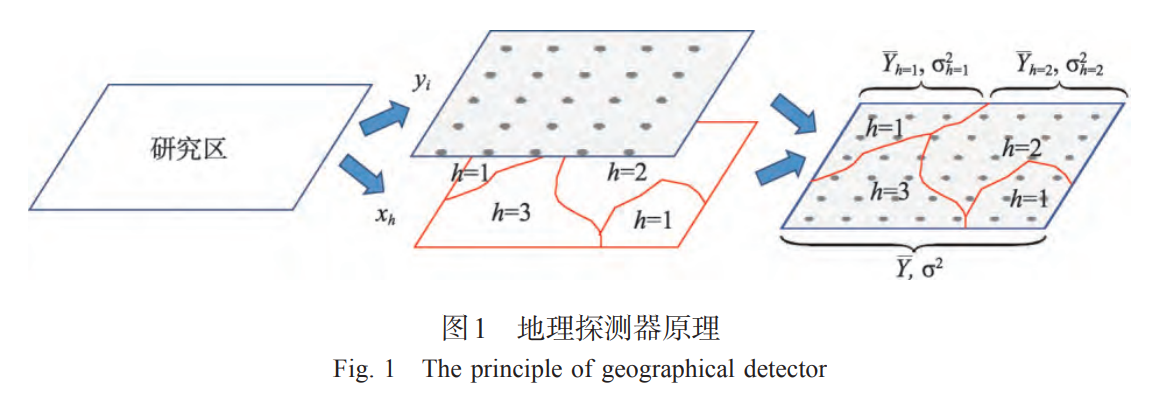

式中：h = 1, …, L为变量Y或因子X的分层 （Strata），即分类或分区；Nh和N分别为层h和全区的单元数； $ \sigma_h^2$ 和 $ \sigma^2$ 分别是层h和全区的Y值的方差。SSW和SST分别为层内方差之和 （Within Sum of Squares） 和全区总方差 （Total Sum of Squares）。q的值域为[0,1]，值越大说明Y的空间分异性越明显；如果分层是由自变量X生成的，则q值越大表示自变量X对属性Y的解释力越强，反之则越弱。极端情况下，q值为1表明因子X完全控制了Y的空间分布，q值为0则表明因子X与Y没有任何关系，q值表示X解释了100×q%的Y。

q值的一个简单变换满足非中心F分布：

$$ F = \frac {N-L}{L-1} \frac {q}{1-q} \sim F(L-1,N-L;\lambda) \tag{2}\label{2}$$

$$ \lambda = \frac {1}{\sigma^2}[\sum_{h=1}^L\overline{Y}_h^2 - \frac {1}{N}(\sum_{h=1}^L \sqrt{N_h} \overline{Y}_h) ^2] \tag{3}\label{3} $$

式中：$\lambda$为非中心参数；$\overline Y_h$ 为层h的均值。根据式（3），可以查表或者使用地理探测器软件来检验q值是否显著。

交互作用探测：识别不同风险因子Xs之间的交互作用，即评估因子X1和X2共同作用时是否会增加或减弱对因变量 Y 的解释力，或这些因子对Y的影响是相互独立的。评估的方法是首先分别计算两种因子 X1 和 X2 对 Y 的q 值 ： q(X1) 和 q(X2)，并且计算它们交互（叠加变量 X1 和 X2 两个图层相切所形成的新的多边形分布，图2）时的q值： q(X1 ∩ X2) ，并对q(X1)、q(X2)与q(X1 ∩ X2)进行比较。两个因子之间的关系可分为以下几类（图3）；

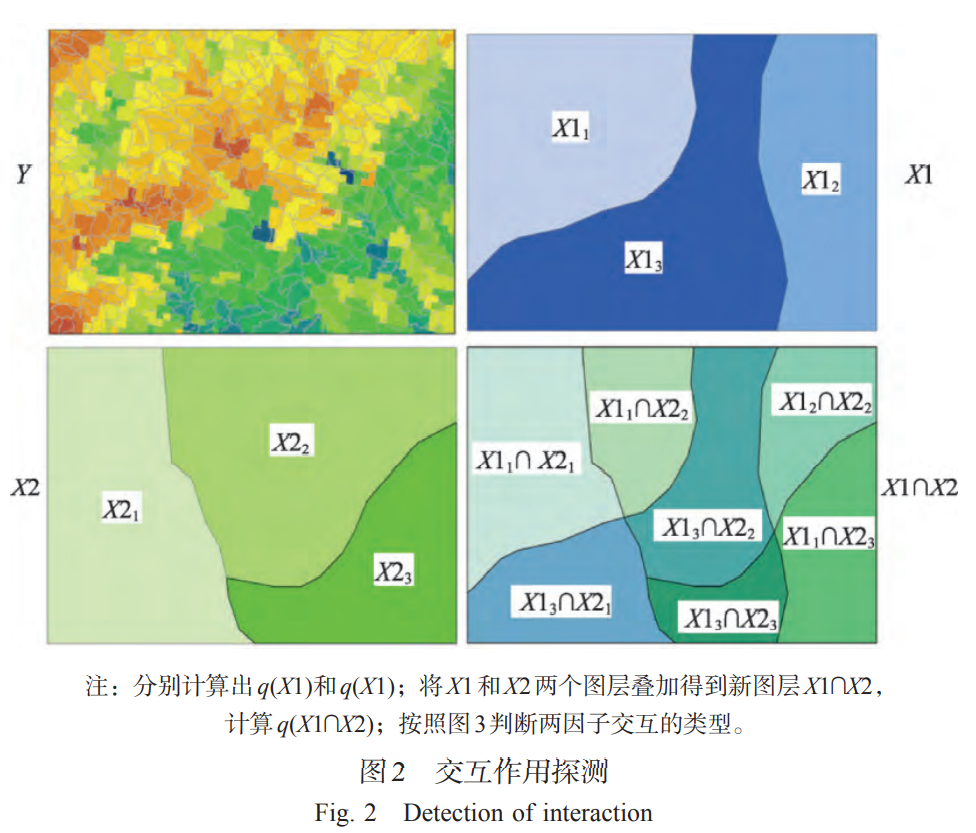

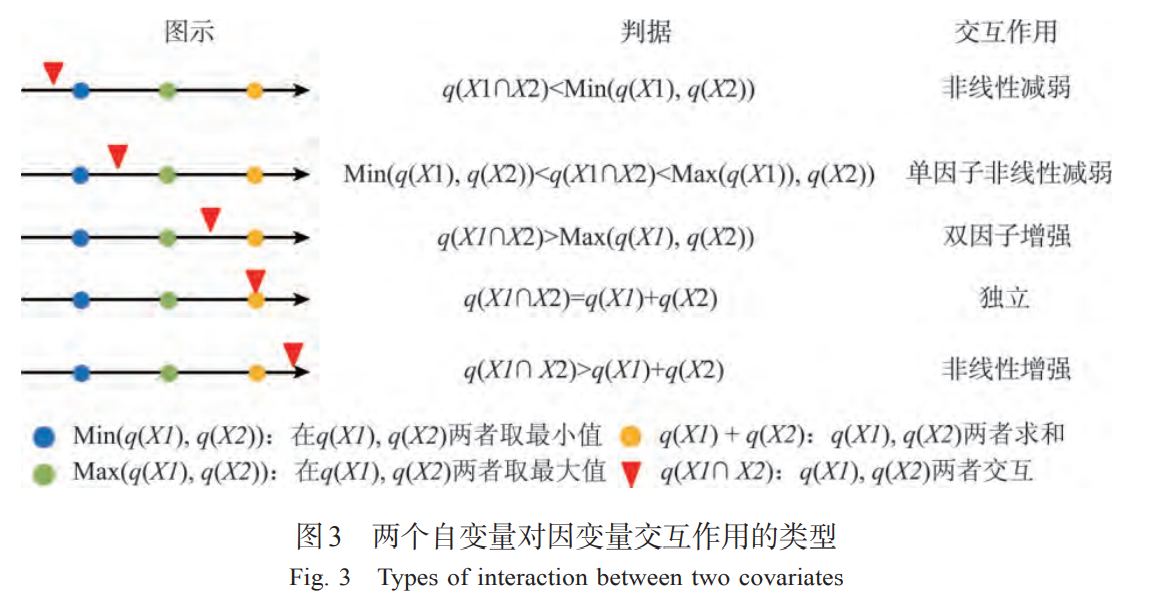

风险区探测：用于判断两个子区域间的属性均值是否有显著的差别，用t统计量来检验：

$$ t_{\overline y_{h=1 \ \ }  -  \overline y_{h=2}}= \frac {\overline Y_{h=1} \ -\ \overline Y_{h=2}} {[\frac{Var(\overline Y_{h=1}\ \ )}{n_{h=1}} + \frac{Var(\overline Y_{h= 2\ \ })}{n_{h=\ 2}}]^{1/2}}    \tag{4}\label{4}$$ 

式中： $\overline Y _{h=1}$ 表示子区域 h内的属性均值，如发病率或流行率；$n_h$为子区域h内样本数量，Var表示方差。统计量t近似地服从Student's t分布，其中自由度的计算方法为：

$$ df = \frac {\frac{Var(\overline Y_{h=1}\ )}{n_{z=1}} + \frac{Var(\overline Y_{h=2}\ )}{n_{h=2}} }{\frac{1}{n_{h=1\ \ }-1}  [\frac{Var(\overline Y_{h=1}\ )}{n_{h=1}}]^2 + \frac{1}{n_{h=2 \ }-1}  [\frac{Var(\overline Y_{h=2 \ })}{n_{h=2}}]^2}    \tag{5}\label{5}$$

零假设$H_0$：$\overline Y_{h=1} = \overline Y_{h=2}$ ，如果在置信水平α下拒绝$H_0$，则认为两个子区域间的属性均值存在着明显的差异。

生态探测：用于比较两因子X1和X2对属性Y的空间分布的影响是否有显著的差异，以F统计量来衡量：

$$  F = \frac {N_{x1}(N_{x2}-1)SSW_{x1}}{N_{x2}(N_{x1}-1)SSW_{x2}} \\ SSW_{x1}=\sum_{h=1}^{L1}N_h \sigma_h^2 , \ \ \ SSW_{x2} = \sum_{h=1}^{L2} N_h \sigma_h^2  \tag{6}\label{6}$$

式中：$N_{X1}$及$N_{X2}$分别表示两个因子X1和X2的样本量；$SSW_{X1}$和$SSW_{X2}$分别表示由X1和X2形成的分层的层内方差之和；L1和L2分别表示变量X1和X2分层数目。其中零假设$H_0$：$SSW_{X1}＝SSW_{X2}$。如果在α的显著性水平上拒绝$H_0$，这表明两因子X1和X2对属性Y的空间分布的影响存在着显著的差异。

## 2. 地理探测器（R）

GeoDetector包包括五个功能:
- factor_detector, 
- interaction_detector, 
- risk_detector,ecological_detector 
- geodetector

前四个功能实现因子检测器，交互检测器，风险检测器和生态检测器的算法，可以使用表数据计算，例如，可以计算 CSV格式（表1）。最后一个函数GeoDetector是一种辅助功能，可用于实现Shapefile格式映射数据的计算（图2）。

|incidence|watershed|soiltype|elevation|
|-----------|-----------|----------|-----------|
|7.20|2|3|6|
|7.01|2|3|6|
|6.79|2|3|6|
|6.73|4|3|6|
|6.77|4|3|1|
|6.74|4|3|6|

<center>Table 1. Demo data in table format</center>

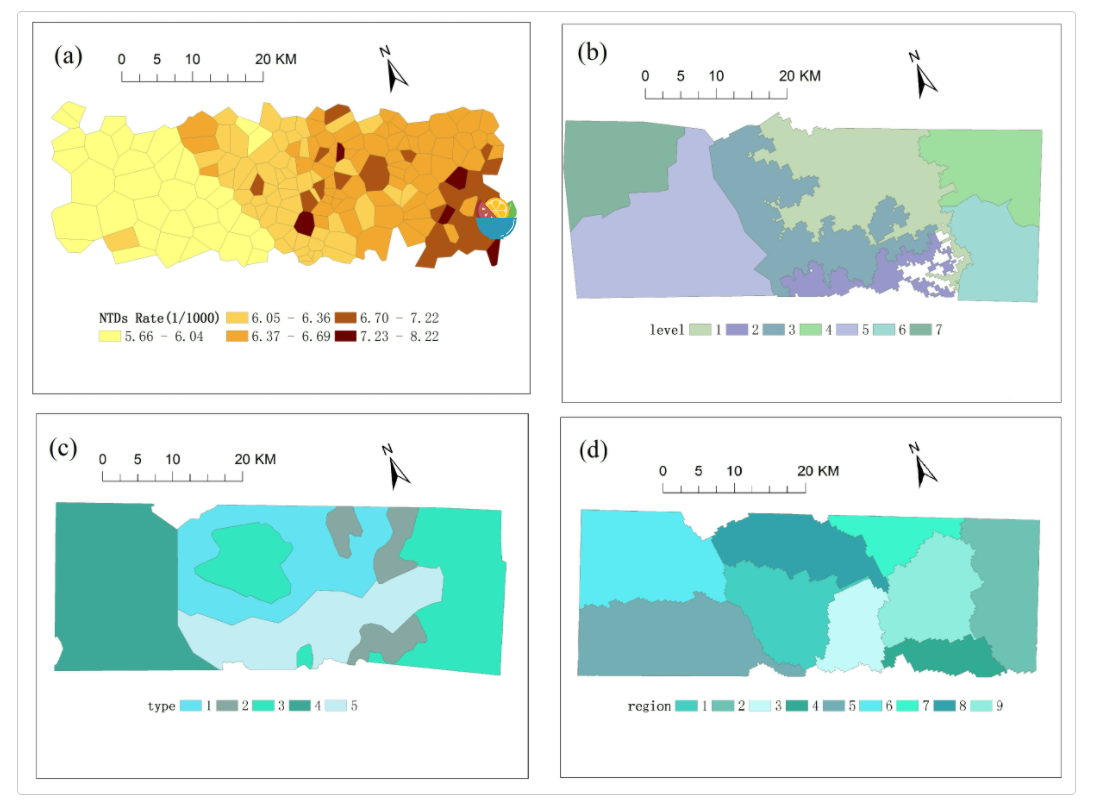
<center>Figure 2. Demo data in GIS format (a) NTDs prevalence Y, (b) Elevation X1, (c) Soil types X2, (d) Watersheds X3</center>

GeoDetector包取决于以下包：RGEO，SP，MapTools和RGDAL，应提前安装。

作为一个演示，提供了神经管畸形出生缺陷（NTDs）的发生Y和疑似村庄的环境风险因子或其代理变量Xs，包括健康效果GIS层和环境因子GIS图层，“海拔”，“土壤类型”的数据，以及 “流域”。

下载geodetector包：

In [1]:
install.packages("geodetector")

also installing the dependency ‘rgdal’


Warning message in install.packages("geodetector"):
“installation of package ‘rgdal’ had non-zero exit status”
Warning message in install.packages("geodetector"):
“installation of package ‘geodetector’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



加载包

In [1]:
library(geodetector)

ERROR: Error in library(geodetector): there is no package called ‘geodetector’


### 2.1 分异及因子探测

### 2.2 交互探测

### 2.3 风险探测

### 2.4 生态探测

### 2.5 将数据从地图转换为表格格式

### 2.6 输出